# Internship Task 1:Chatbot Usage Analytics

 Life cycle of this task 
* Understanding the problem statement
* Data collection
* Exploration Data Analysis(EDA)
* Data Cleaning and Preprocessing
* Building Analystic Dashboard

## About
Chatbots have become an integral part of customer interactions, providing automated responses to user queries. Understanding chatbot performance and user behavior is crucial to enhancing the overall experience. This task focuses on deriving key metrics from chatbot interactions to track and improve chatbot efficiency.

### 1. Problem Statement
* As organizations increasingly rely on chatbots for customer support, it becomes essential to monitor and evaluate their performance.
* The objective is to analyze user interactions and create a dashboard that highlights key metrics, including:
* Total number of queries handled
* Most common topics discussed
* User satisfaction ratings
* This project will leverage the NLP Chatbot dataset from Kaggle to extract insights and build a dashboard to display these metrics.

### 2. Data Collection
* The dataset used for this project is sourced from Kaggle.
* The dataset consists of 10000 rows and 14 columns

https://www.kaggle.com/datasets/teamincribo/nlp-chatbot-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("data\chatbot_dataset.csv")

In [3]:
df.head()

,User ID,User Utterance,Bot Response,Timestamp,Context/Session ID,Entities,User Feedback,Conversation Outcome,User Profile,Channel/Platform,Language,User Emotion/Sentiment,Location,User Segment
0,uKqYhMMQ5S,Charge bar between follow student.,Important law into large example range. Player...,2023-10-31 18:02:06,4dfe56dc-efe2-49c6-be9f-ce5b84ca4de4,event,negative,incomplete,Annette Henderson,social media,German,confused,Sydney,returning customers
1,YOonrpgxp9,Bad every reflect huge contain.,Policy argue agree character go recent. When r...,2023-10-31 18:02:06,74c97616-9df6-460d-991d-c6f6f6ae5354,location,neutral,specific outcome,Nicholas Haney,mobile app,Chinese,frustrated,London,returning customers
2,V0IwFXGYAg,Glass remember many dog director under.,Total rise unit recent data away. Business air...,2023-10-31 18:02:06,f3034d75-d552-4a6c-8c73-0f6b441a7bdf,event,negative,incomplete,David Smith,website chat,Spanish,excited,Tokyo,premium users
3,3mtwyCBGqy,Help charge record many talk tough.,Artist today decade. Civil score hospital othe...,2023-10-31 18:02:06,46c7bf6a-1da6-4e27-baf5-a138f1e0a1b2,service,negative,incomplete,Susan Wilson,website chat,English,frustrated,Sydney,new users
4,dSQOFGb8Pq,Position not man much material.,Character serve receive interview interest ord...,2023-10-31 18:02:06,2487c6ce-65c1-48a4-a76f-0aa6a1e92dda,service,neutral,specific outcome,Jennifer Harmon,mobile app,Spanish,confused,New York,returning customers


In [4]:
## shape of the dataset
df.shape

(10000, 14)

In [5]:
## Display summary of the dataset
df.describe()

,User ID,User Utterance,Bot Response,Timestamp,Context/Session ID,Entities,User Feedback,Conversation Outcome,User Profile,Channel/Platform,Language,User Emotion/Sentiment,Location,User Segment
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,2,10000,5,3,3,9386,4,5,5,5,3
top,uKqYhMMQ5S,Charge bar between follow student.,Important law into large example range. Player...,2023-10-31 18:02:06,4dfe56dc-efe2-49c6-be9f-ce5b84ca4de4,service,neutral,successful,Matthew Williams,social media,English,neutral,New York,premium users
freq,1,1,1,6147,1,2029,3353,3355,7,2585,2062,2056,2073,3371


In [6]:
## check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   User ID                 10000 non-null  object
 1   User Utterance          10000 non-null  object
 2   Bot Response            10000 non-null  object
 3   Timestamp               10000 non-null  object
 4   Context/Session ID      10000 non-null  object
 5   Entities                10000 non-null  object
 6   User Feedback           10000 non-null  object
 7   Conversation Outcome    10000 non-null  object
 8   User Profile            10000 non-null  object
 9   Channel/Platform        10000 non-null  object
 10  Language                10000 non-null  object
 11  User Emotion/Sentiment  10000 non-null  object
 12  Location                10000 non-null  object
 13  User Segment            10000 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [ ]:
## No null values & only object dtypes

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
## columns names
print(df.columns)


Index(['User ID', 'User Utterance', 'Bot Response', 'Timestamp',
       'Context/Session ID', 'Entities', 'User Feedback',
       'Conversation Outcome', 'User Profile', 'Channel/Platform', 'Language',
       'User Emotion/Sentiment', 'Location', 'User Segment'],
      dtype='object')


In [9]:
df.columns = df.columns.str.strip()  # Removes any leading/trailing spaces from column names


In [10]:
## convert date column
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

df.head(1)

,User ID,User Utterance,Bot Response,Timestamp,Context/Session ID,Entities,User Feedback,Conversation Outcome,User Profile,Channel/Platform,Language,User Emotion/Sentiment,Location,User Segment,Year,Month,Day,Hour
0,uKqYhMMQ5S,Charge bar between follow student.,Important law into large example range. Player...,2023-10-31 18:02:06,4dfe56dc-efe2-49c6-be9f-ce5b84ca4de4,event,negative,incomplete,Annette Henderson,social media,German,confused,Sydney,returning customers,2023,10,31,18


In [11]:
## convert numeric columns
numeric_columns =['Year','Month','Day', 'Hour']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Numeric_Columns:",numeric_columns)
   


Numeric_Columns: ['Year', 'Month', 'Day', 'Hour']


In [12]:
## convert categorical columns
categorical_columns = ['User Profile','Channel/Platform','Language','User Segment']
for col in categorical_columns:
    df[col] = df[col].astype('category')
print("Categorical_Columns:",categorical_columns)    

Categorical_Columns: ['User Profile', 'Channel/Platform', 'Language', 'User Segment']


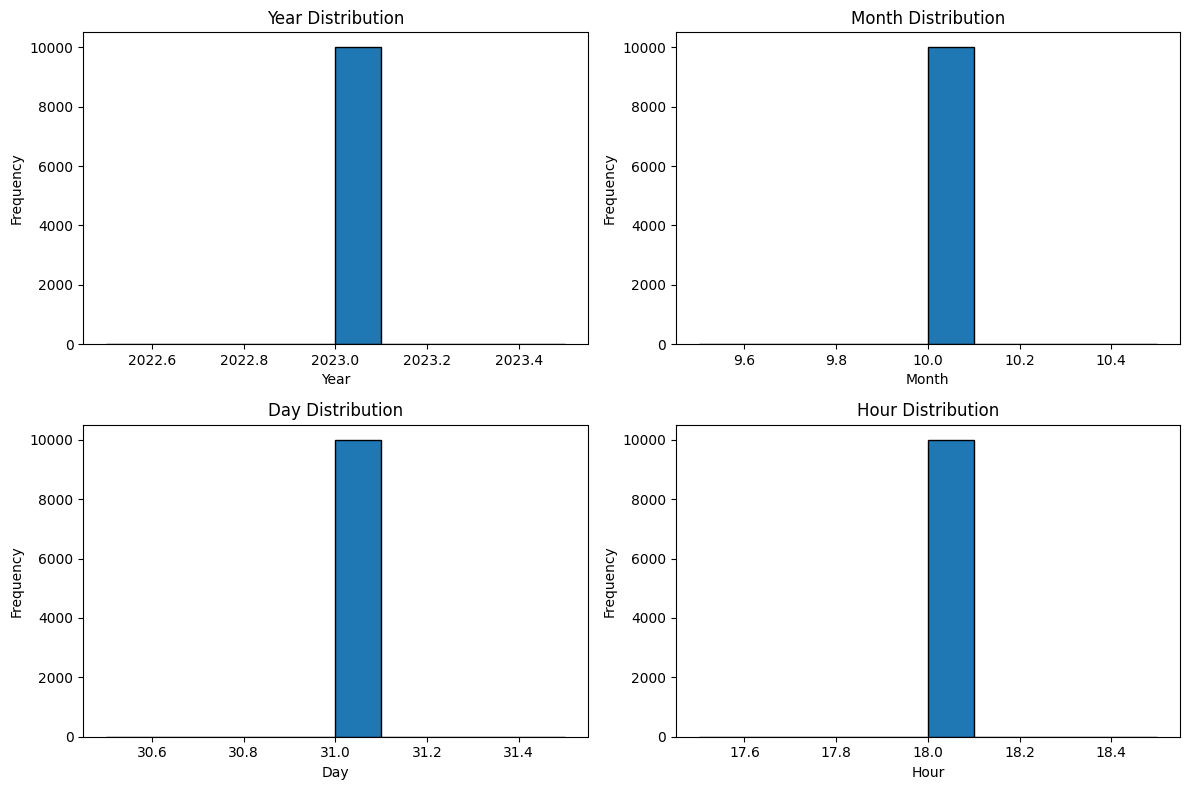

In [13]:
## Histograms plot for numeric_columns
columns_to_plot = ['Year','Month','Day','Hour']
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot,1):
    plt.subplot(2, 2, i)
    df[col].plot(kind='hist', bins=10, edgecolor='black', title=f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()    

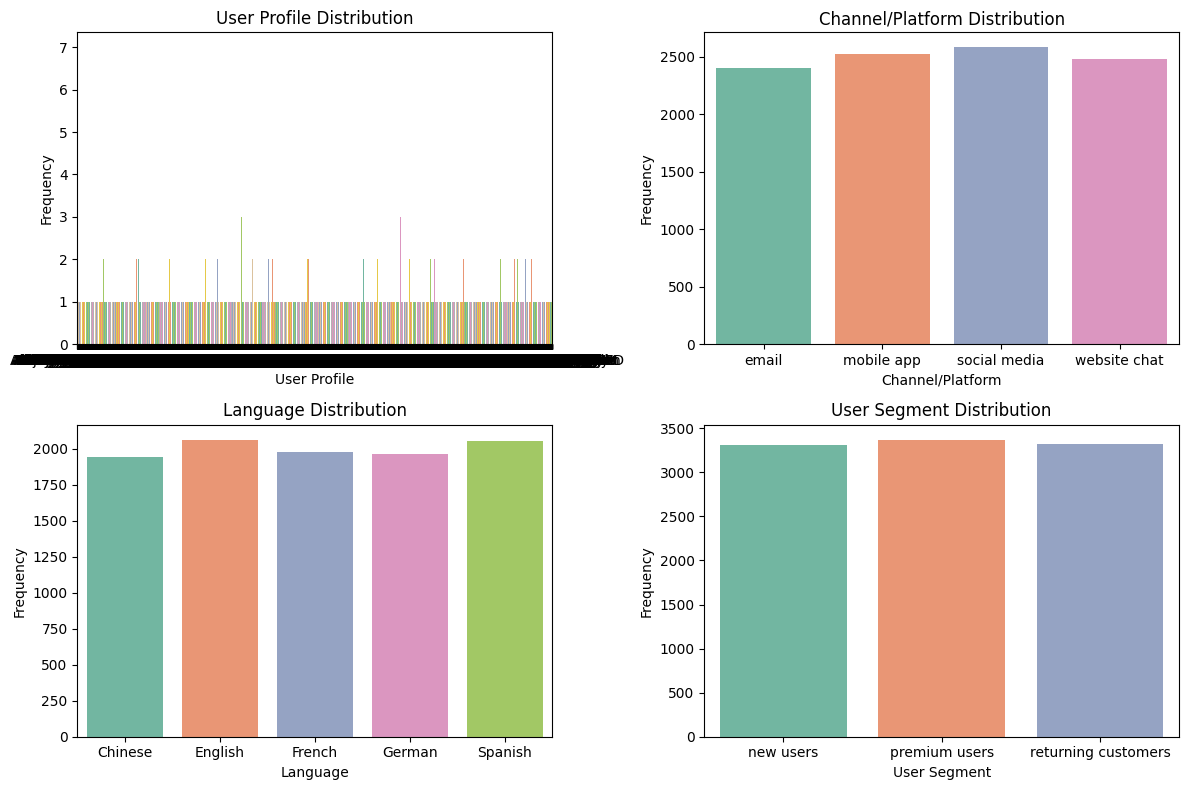

In [14]:
## Bar plots for categorical columns
categorical_columns = ['User Profile', 'Channel/Platform','Language','User Segment']
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_columns,1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show() 

## Main tasks of this Task 1

# Count the Number of Queries

In [15]:
# total number of queries
total_queries = df.shape[0]
print(f"Total Number of Queries: {total_queries}")

Total Number of Queries: 10000


In [16]:
#queries per channel/platform
queries_by_channel = df['Channel/Platform'].value_counts()
print("\nQueries by Channel/Platform:")
print(queries_by_channel)


Queries by Channel/Platform:
Channel/Platform
social media    2585
mobile app      2526
website chat    2485
email           2404
Name: count, dtype: int64


In [17]:
#queries over time
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [18]:

queries_over_time = df.groupby(df['Timestamp'].dt.date).size()
print("\nQueries Over Time (Daily):")
print(queries_over_time)


Queries Over Time (Daily):
Timestamp
2023-10-31    10000
dtype: int64


In [19]:
queries_by_hour = df.groupby(df['Timestamp'].dt.hour).size()
print("\nQueries Over Time (Hourly):")
print(queries_by_hour)


Queries Over Time (Hourly):
Timestamp
18    10000
dtype: int64


### Insights
Social Media (2585) and mobile app(2526) lead in queries.

# Most common topics

In [20]:
df.head(2)

,User ID,User Utterance,Bot Response,Timestamp,Context/Session ID,Entities,User Feedback,Conversation Outcome,User Profile,Channel/Platform,Language,User Emotion/Sentiment,Location,User Segment,Year,Month,Day,Hour
0,uKqYhMMQ5S,Charge bar between follow student.,Important law into large example range. Player...,2023-10-31 18:02:06,4dfe56dc-efe2-49c6-be9f-ce5b84ca4de4,event,negative,incomplete,Annette Henderson,social media,German,confused,Sydney,returning customers,2023,10,31,18
1,YOonrpgxp9,Bad every reflect huge contain.,Policy argue agree character go recent. When r...,2023-10-31 18:02:06,74c97616-9df6-460d-991d-c6f6f6ae5354,location,neutral,specific outcome,Nicholas Haney,mobile app,Chinese,frustrated,London,returning customers,2023,10,31,18


In [21]:
from collections import Counter

# print top 10 most common entities
entity_counts = Counter(df['Entities'].dropna())
print(entity_counts.most_common(10))

[('service', 2029), ('location', 2024), ('event', 2020), ('date', 1983), ('product', 1944)]


In [24]:
# Most common words
from sklearn.feature_extraction.text import CountVectorizer

## top 10 words 
vectorizer = CountVectorizer(stop_words='english', max_features=10)

# fit the model on the 'User Utterance' column
common_words = vectorizer.fit_transform(df['User Utterance'])

Keywords = vectorizer.get_feature_names_out()
print("Most common Keywords:",Keywords)

Most common Keywords: ['ball' 'big' 'blue' 'far' 'figure' 'light' 'live' 'low' 'man' 'rule']


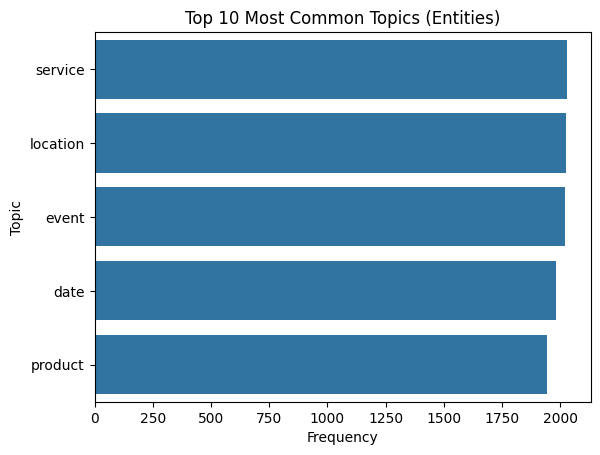

In [26]:
# convert the entity counts to a dataframe
topics_df = pd.DataFrame(entity_counts.most_common(10), columns=['Topic', 'Frequency'])

# bar plot
sns.barplot(data=topics_df, x='Frequency', y='Topic')
plt.title("Top 10 Most Common Topics (Entities)")
plt.show()

In [27]:
word_counts = zip(Keywords, common_words.toarray().sum(axis=0))
word_df = pd.DataFrame(word_counts, columns=['Keyword', 'Frequency'])

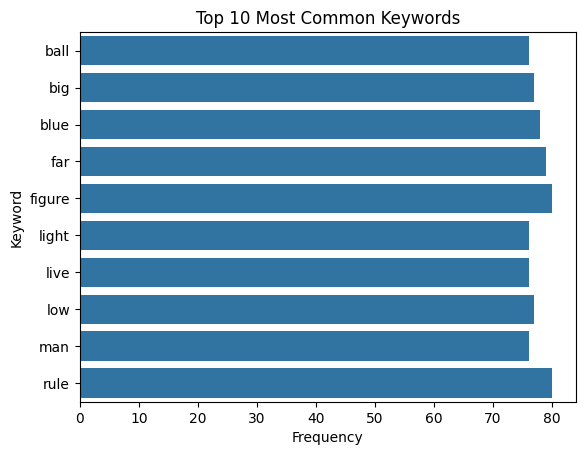

In [29]:
# bar plot 
sns.barplot(data=word_df, x='Frequency', y='Keyword')
plt.title("Top 10 Most Common Keywords")
plt.show()

### Insights
The common topics - service,location,event ,date,and product -indicate frequent user queries on these areas.Keywords like "ball","big","blue" users focus on product or event attributes.

In [30]:
df.head(1)

,User ID,User Utterance,Bot Response,Timestamp,Context/Session ID,Entities,User Feedback,Conversation Outcome,User Profile,Channel/Platform,Language,User Emotion/Sentiment,Location,User Segment,Year,Month,Day,Hour
0,uKqYhMMQ5S,Charge bar between follow student.,Important law into large example range. Player...,2023-10-31 18:02:06,4dfe56dc-efe2-49c6-be9f-ce5b84ca4de4,event,negative,incomplete,Annette Henderson,social media,German,confused,Sydney,returning customers,2023,10,31,18


# User Satisfaction Ratings

In [31]:

# mapping quaalitative feedback to numerical values
feedback_map = {'positive': 1,'neutral': 0,'negative': -1}
## apply the 'user feedback' column and create a new "Feedback_score" column

df['Feedback_Score'] = df['User Feedback'].map(feedback_map)

In [32]:
df.head(1)

,User ID,User Utterance,Bot Response,Timestamp,Context/Session ID,Entities,User Feedback,Conversation Outcome,User Profile,Channel/Platform,Language,User Emotion/Sentiment,Location,User Segment,Year,Month,Day,Hour,Feedback_Score
0,uKqYhMMQ5S,Charge bar between follow student.,Important law into large example range. Player...,2023-10-31 18:02:06,4dfe56dc-efe2-49c6-be9f-ce5b84ca4de4,event,negative,incomplete,Annette Henderson,social media,German,confused,Sydney,returning customers,2023,10,31,18,-1


In [33]:
# calcilate the average satisfaction score
avg_satisfaction = df ['Feedback_Score'].mean()
print(f"Average Satisfaction Rating: {avg_satisfaction}")

Average Satisfaction Rating: -0.0005


In [34]:
# count each sentiment type in the 'User Emotion/Sentiment' column
sentiment_counts = df ['User Emotion/Sentiment'].value_counts()
print(sentiment_counts)

User Emotion/Sentiment
neutral       2056
frustrated    2041
excited       1991
confused      1962
happy         1950
Name: count, dtype: int64


# create a user satisfaction rating columns with a scale of 1 to 5

In [35]:
def calculate_satisfaction(row):
    feedback_score = row['Feedback_Score']

    sentiment = row['User Emotion/Sentiment']


    sentiment_score = {'positive': 2, 'netural':1, 'negative':0}
    sentiment_rating = sentiment_score.get(sentiment,1) 

    ## combine the feedback and sentiment scores to create 1-5 scale rating
    combined_score = feedback_score + sentiment_rating

    if combined_score >= 3:
        return 5
    elif combined_score == 2:
        return 4
    elif combined_score == 1:
        return 3
    elif combined_score == 0:
        return 2
    else:
        return 1
    
    ## User_rating column
df['User_Rating'] = df.apply(calculate_satisfaction, axis=1)


In [38]:
df.head(3)

,User ID,User Utterance,Bot Response,Timestamp,Context/Session ID,Entities,User Feedback,Conversation Outcome,User Profile,Channel/Platform,Language,User Emotion/Sentiment,Location,User Segment,Year,Month,Day,Hour,Feedback_Score,User_Rating
0,uKqYhMMQ5S,Charge bar between follow student.,Important law into large example range. Player...,2023-10-31 18:02:06,4dfe56dc-efe2-49c6-be9f-ce5b84ca4de4,event,negative,incomplete,Annette Henderson,social media,German,confused,Sydney,returning customers,2023,10,31,18,-1,2
1,YOonrpgxp9,Bad every reflect huge contain.,Policy argue agree character go recent. When r...,2023-10-31 18:02:06,74c97616-9df6-460d-991d-c6f6f6ae5354,location,neutral,specific outcome,Nicholas Haney,mobile app,Chinese,frustrated,London,returning customers,2023,10,31,18,0,3
2,V0IwFXGYAg,Glass remember many dog director under.,Total rise unit recent data away. Business air...,2023-10-31 18:02:06,f3034d75-d552-4a6c-8c73-0f6b441a7bdf,event,negative,incomplete,David Smith,website chat,Spanish,excited,Tokyo,premium users,2023,10,31,18,-1,2


In [37]:
## display to check the new column
print (df[['User Feedback' , 'User Emotion/Sentiment','User_Rating']].head())

  User Feedback User Emotion/Sentiment  User_Rating
0      negative               confused            2
1       neutral             frustrated            3
2      negative                excited            2
3      negative             frustrated            2
4       neutral               confused            3


In [39]:
df.head()

,User ID,User Utterance,Bot Response,Timestamp,Context/Session ID,Entities,User Feedback,Conversation Outcome,User Profile,Channel/Platform,Language,User Emotion/Sentiment,Location,User Segment,Year,Month,Day,Hour,Feedback_Score,User_Rating
0,uKqYhMMQ5S,Charge bar between follow student.,Important law into large example range. Player...,2023-10-31 18:02:06,4dfe56dc-efe2-49c6-be9f-ce5b84ca4de4,event,negative,incomplete,Annette Henderson,social media,German,confused,Sydney,returning customers,2023,10,31,18,-1,2
1,YOonrpgxp9,Bad every reflect huge contain.,Policy argue agree character go recent. When r...,2023-10-31 18:02:06,74c97616-9df6-460d-991d-c6f6f6ae5354,location,neutral,specific outcome,Nicholas Haney,mobile app,Chinese,frustrated,London,returning customers,2023,10,31,18,0,3
2,V0IwFXGYAg,Glass remember many dog director under.,Total rise unit recent data away. Business air...,2023-10-31 18:02:06,f3034d75-d552-4a6c-8c73-0f6b441a7bdf,event,negative,incomplete,David Smith,website chat,Spanish,excited,Tokyo,premium users,2023,10,31,18,-1,2
3,3mtwyCBGqy,Help charge record many talk tough.,Artist today decade. Civil score hospital othe...,2023-10-31 18:02:06,46c7bf6a-1da6-4e27-baf5-a138f1e0a1b2,service,negative,incomplete,Susan Wilson,website chat,English,frustrated,Sydney,new users,2023,10,31,18,-1,2
4,dSQOFGb8Pq,Position not man much material.,Character serve receive interview interest ord...,2023-10-31 18:02:06,2487c6ce-65c1-48a4-a76f-0aa6a1e92dda,service,neutral,specific outcome,Jennifer Harmon,mobile app,Spanish,confused,New York,returning customers,2023,10,31,18,0,3


In [40]:
# save the processed data 
df.to_csv('Processed_dataset.csv', index=False)

In [41]:
df = pd.read_csv('Processed_dataset.csv')

In [42]:
df.head()

,User ID,User Utterance,Bot Response,Timestamp,Context/Session ID,Entities,User Feedback,Conversation Outcome,User Profile,Channel/Platform,Language,User Emotion/Sentiment,Location,User Segment,Year,Month,Day,Hour,Feedback_Score,User_Rating
0,uKqYhMMQ5S,Charge bar between follow student.,Important law into large example range. Player...,2023-10-31 18:02:06,4dfe56dc-efe2-49c6-be9f-ce5b84ca4de4,event,negative,incomplete,Annette Henderson,social media,German,confused,Sydney,returning customers,2023,10,31,18,-1,2
1,YOonrpgxp9,Bad every reflect huge contain.,Policy argue agree character go recent. When r...,2023-10-31 18:02:06,74c97616-9df6-460d-991d-c6f6f6ae5354,location,neutral,specific outcome,Nicholas Haney,mobile app,Chinese,frustrated,London,returning customers,2023,10,31,18,0,3
2,V0IwFXGYAg,Glass remember many dog director under.,Total rise unit recent data away. Business air...,2023-10-31 18:02:06,f3034d75-d552-4a6c-8c73-0f6b441a7bdf,event,negative,incomplete,David Smith,website chat,Spanish,excited,Tokyo,premium users,2023,10,31,18,-1,2
3,3mtwyCBGqy,Help charge record many talk tough.,Artist today decade. Civil score hospital othe...,2023-10-31 18:02:06,46c7bf6a-1da6-4e27-baf5-a138f1e0a1b2,service,negative,incomplete,Susan Wilson,website chat,English,frustrated,Sydney,new users,2023,10,31,18,-1,2
4,dSQOFGb8Pq,Position not man much material.,Character serve receive interview interest ord...,2023-10-31 18:02:06,2487c6ce-65c1-48a4-a76f-0aa6a1e92dda,service,neutral,specific outcome,Jennifer Harmon,mobile app,Spanish,confused,New York,returning customers,2023,10,31,18,0,3


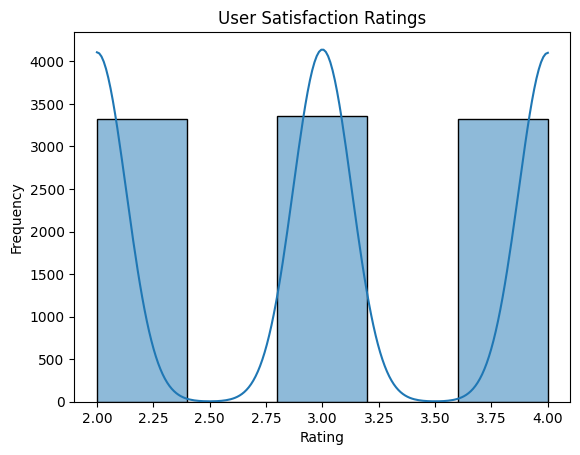

In [43]:
## visualization 
sns.histplot(df['User_Rating'], kde=True, bins=5)
plt.title('User Satisfaction Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Data Aggregation For Dashboard



In [45]:
# Total Queries per day/hour

queries_per_day = df.groupby('Day').size()
queries_per_hour = df.groupby('Hour').size()

print("Total Queries Per Day:\n",queries_per_day )
print("Total Queries Per Hour:\n",queries_per_hour )

Total Queries Per Day:
 Day
31    10000
dtype: int64
Total Queries Per Hour:
 Hour
18    10000
dtype: int64


In [46]:
# Moat commaon topics

top_topics = df['Entities'].value_counts().head(10)
print("Top topics:\n", top_topics)

Top topics:
 Entities
service     2029
location    2024
event       2020
date        1983
product     1944
Name: count, dtype: int64


In [47]:
## Satisfaction Ratings
Satisfaction_per_day = df.groupby('Day')['User_Rating'].mean()
Satisfaction_per_hour = df.groupby('Hour')['User_Rating'].mean()

print("Satisfaction Rating by Day:\n",Satisfaction_per_day )
print("Total Queries Per Hour:\n",Satisfaction_per_hour )

Satisfaction Rating by Day:
 Day
31    2.9995
Name: User_Rating, dtype: float64
Total Queries Per Hour:
 Hour
18    2.9995
Name: User_Rating, dtype: float64
